<a href="https://colab.research.google.com/github/Bunyodbekkk/classification-around-different-products-about-AI/blob/main/AI_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.5.3

     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:41tcmalloc: large alloc 1147494400 bytes == 0x39fc4000 @  0x7fbb62a3d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.9 kB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu1

In [1]:
import torch
import fastai
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 9.18 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [5]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Bed Table Couch --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bed.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 37849 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [6]:
from fastai.vision.all import *
from ipywidgets import widgets
path=Path('train')
fls=get_image_files(path)
fls

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


(#600) [Path('train/Couch/176bbae9d244a582.jpg'),Path('train/Couch/69807e1a455b3d26.jpg'),Path('train/Couch/c456d53741d0132b.jpg'),Path('train/Couch/4274cdffb89275a8.jpg'),Path('train/Couch/224b4e3a19db729f.jpg'),Path('train/Couch/1e817feb7347a092.jpg'),Path('train/Couch/22e6a0db53240466.jpg'),Path('train/Couch/ffc0e0b087e9b3f8.jpg'),Path('train/Couch/c78aff0ca5fcd34a.jpg'),Path('train/Couch/caea3bdaa07e8081.jpg')...]

In [7]:
fail= verify_images(path)

zip argument #1 must support iteration


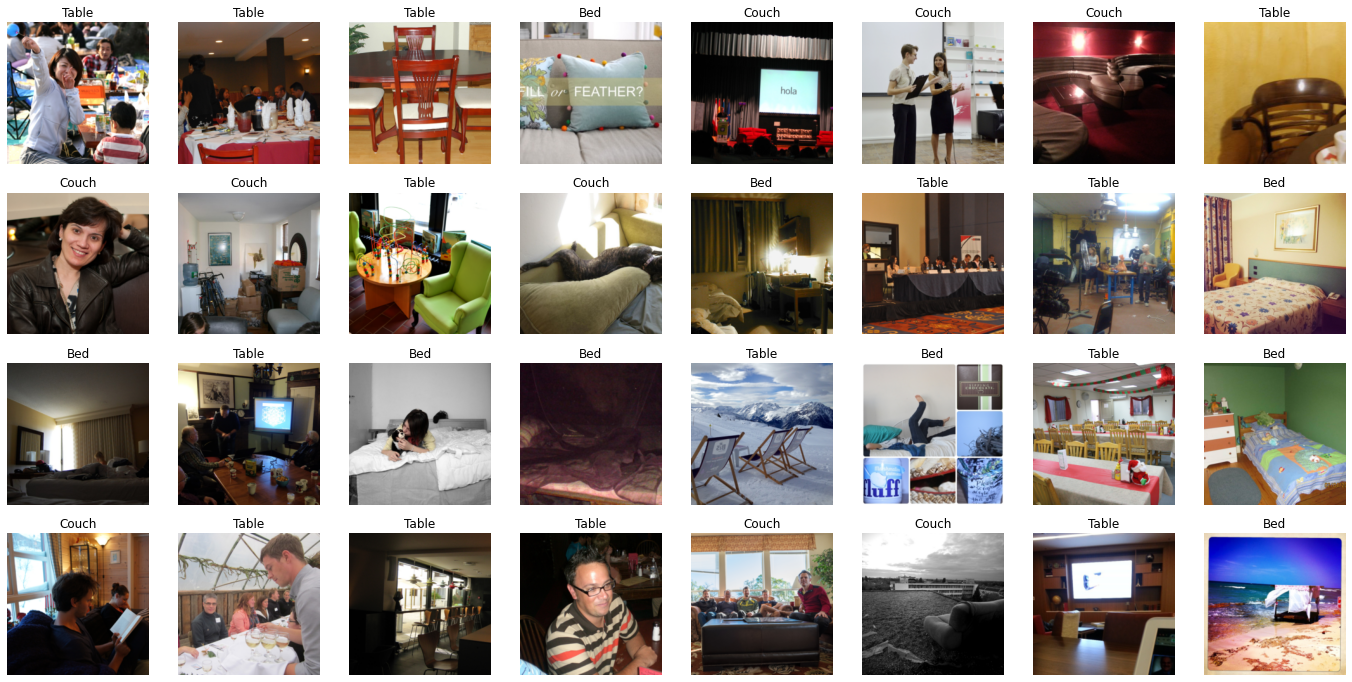

In [8]:
Foods=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=(get_image_files),
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
dls=Foods.dataloaders(path)
dls.train.show_batch(max_n=32,nrows=4)

In [9]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.737794,0.980603,0.666667,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.948778,0.851851,0.691667,00:13
1,0.742140,0.934566,0.708333,00:13
2,0.574878,0.946919,0.758333,00:13
3,0.474151,0.955360,0.725000,00:13


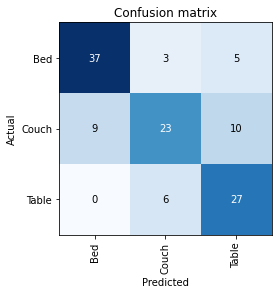

In [10]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

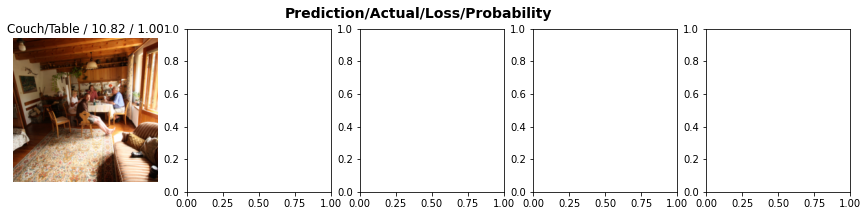

In [11]:
interp.plot_top_losses(5,nrows=1)

In [15]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Couch
Ehtimollik:97.6%


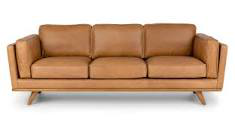

In [17]:
img=PILImage.create(upload.data[-1])
pred,pred_idd,probs=learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimollik:{probs[pred_idd]*100:.1f}%')
img

In [18]:
learn.export("AI_model.pkl")

In [19]:
model=load_learner('/content/AI_model.pkl')

In [20]:
model.predict(img)

('Couch', TensorBase(1), TensorBase([0.0075, 0.9758, 0.0168]))